#🧠 Naive Bayes Classifier – Practical

✨ Objective:

To implement a Gaussian Naive Bayes classifier using synthetic data and evaluate its performance using confusion matrix and decision boundary plot.

#✅ Step 1: Import Required Libraries

In [28]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc
)

# For clean visuals
sns.set(style="whitegrid")


#📊 Step 2: Generate Synthetic Dataset

In [29]:
# Generate 2D synthetic data suitable for classification
X, y = make_classification(
    n_samples=300,        # Total samples
    n_features=2,         # 2 features for easy plotting
    n_informative=2,      # Both features are informative
    n_redundant=0,        # No redundant features
    n_clusters_per_class=1,
    class_sep=1.2,        # Separation between classes
    random_state=42       # Reproducibility
)

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
df["Target"] = y

# Preview the dataset
df.head()


,Feature_1,Feature_2,Target
0,0.933246,-1.631007,0
1,0.856043,1.042841,1
2,0.737983,-2.256550,0
3,1.489308,0.120977,1
4,0.920124,1.177237,1


#📌 Step 3: Visualize Dataset

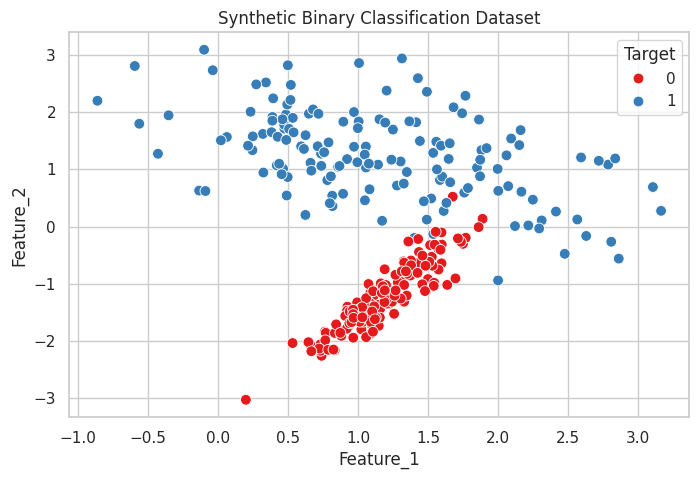

In [30]:
# Scatter plot colored by target class
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Feature_1", y="Feature_2", hue="Target", palette="Set1", s=60)
plt.title("Synthetic Binary Classification Dataset")
plt.show()


#🔀 Step 4: Train-Test Split and Standardization

In [31]:
# Split into train and test sets (75/25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features using StandardScaler (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#🤖 Step 5: Train Naive Bayes Model

In [32]:
# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model using training data
nb_model.fit(X_train_scaled, y_train)


GaussianNB()

#✅ Step 6: Make Predictions & Evaluate Accuracy

In [33]:
# Predict on the test set
y_pred = nb_model.predict(X_test_scaled)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

# Show classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.99

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      1.00      0.99        39

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



#📉 Step 7: Confusion Matrix



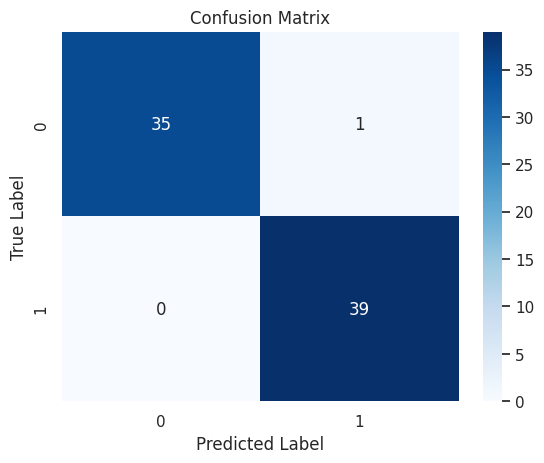

In [34]:
# Create a confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



#🧭 Step 8: Decision Boundary Plot

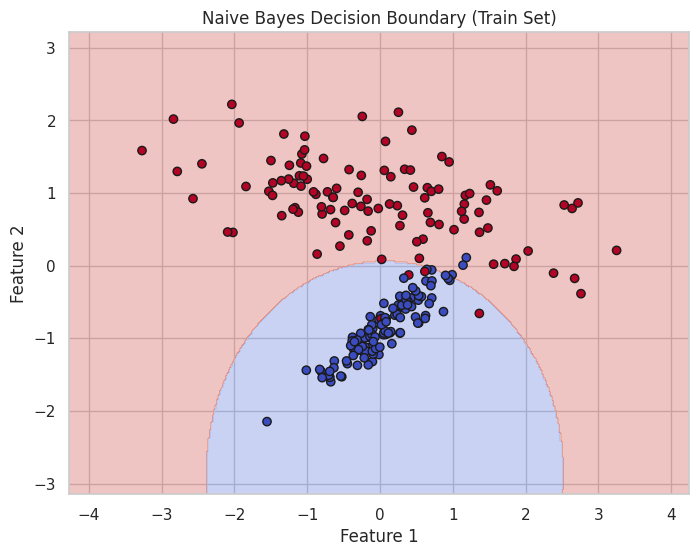

In [35]:
# Create a mesh grid
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the entire grid
Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision surface
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
plt.title("Naive Bayes Decision Boundary (Train Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#📊 Step 9: ROC Curve & AUC

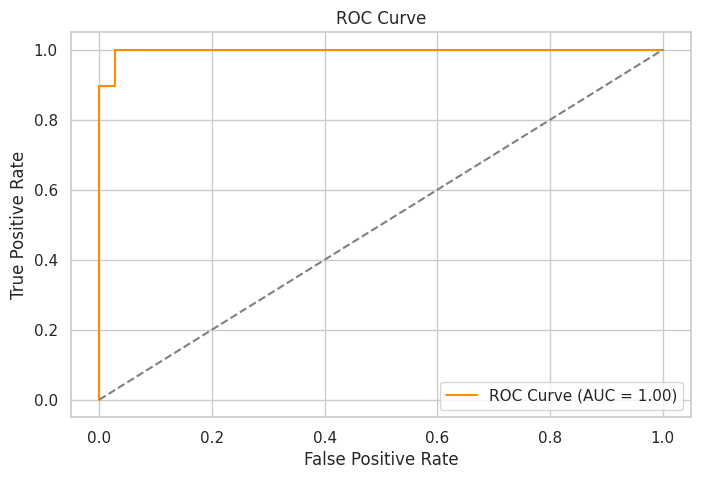

In [36]:
# Get predicted probabilities
y_proba = nb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle='--', color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


#📝 Summary

| Step   | Concept                                                |
| ------ | ------------------------------------------------------ |
| Step 1 | Imported required ML & plotting libraries              |
| Step 2 | Generated synthetic data using `make_classification()` |
| Step 3 | Visualized the dataset using scatterplot               |
| Step 4 | Preprocessed the data using scaling                    |
| Step 5 | Trained a Gaussian Naive Bayes model                   |
| Step 6 | Evaluated predictions with accuracy & report           |
| Step 7 | Visualized Confusion Matrix                            |
| Step 8 | Plotted decision boundary using mesh grid              |
| Step 9 | Drew ROC Curve with AUC Score                          |
